In [1]:
import pandas as pd , numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
df.Month= pd.to_datetime(df.Month)  #converting month data column dtype from object to datetime dtype

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [17]:
df = df.set_index('Month')  #set index from 0,1,2 to month column

In [19]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

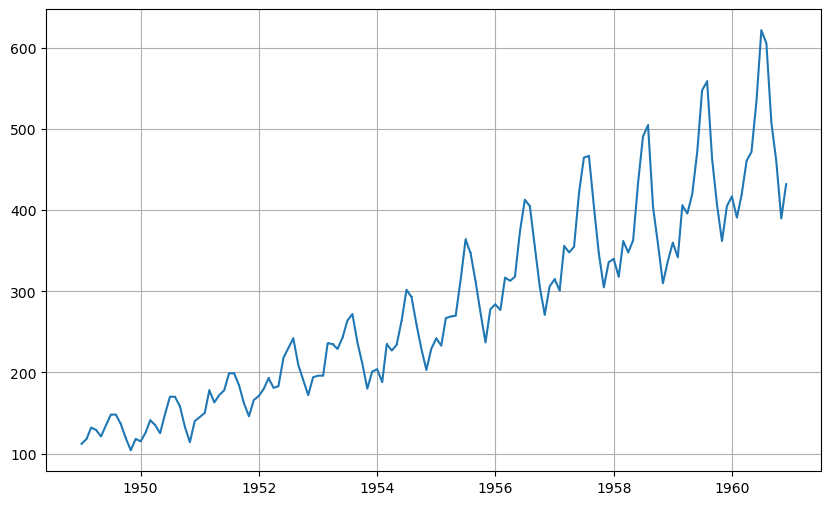

In [23]:
plt.figure(figsize = (10,6))
plt.plot(df,marker = ',')
plt.grid()
plt.show()

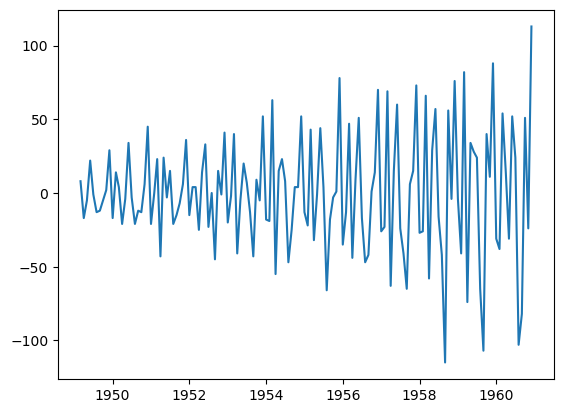

In [25]:
plt.plot(df.diff().diff())  # we are doing second order differencing
plt.show()

In [27]:
df_log = np.log(df)

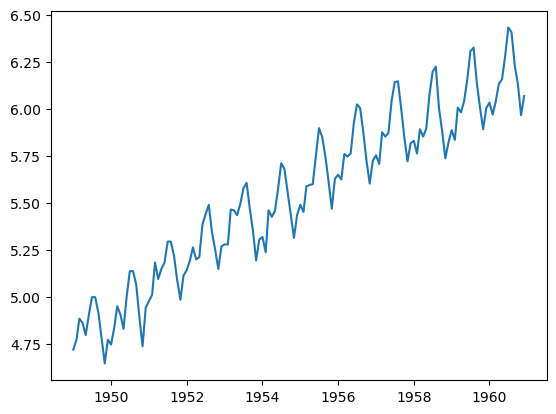

In [29]:
plt.plot(df_log)
plt.show()

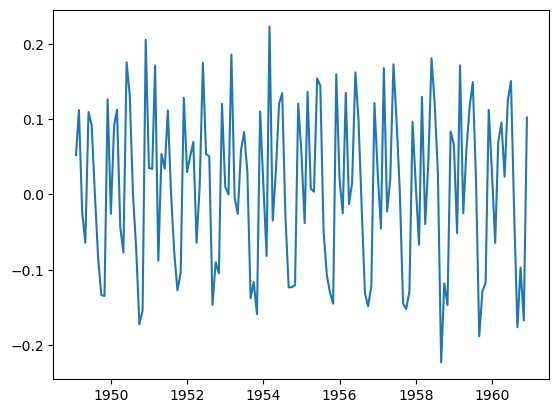

In [31]:
plt.plot(df_log.diff())
plt.show()

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

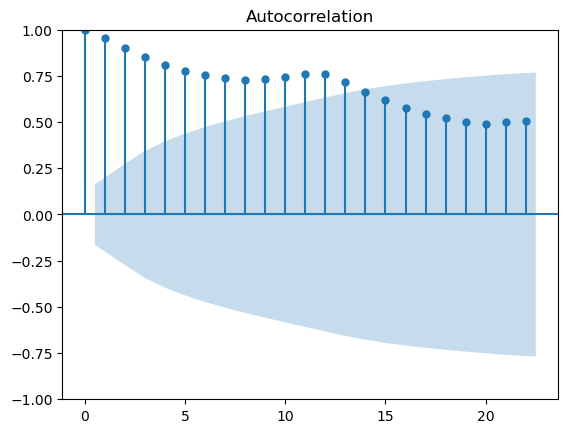

In [37]:
plot_acf(df_log)
plt.show()

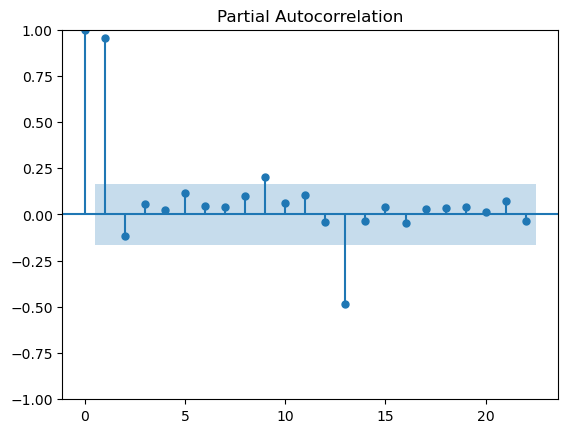

In [39]:
plot_pacf(df_log)
plt.show()

In [43]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --------- ------------------------------ 143.4/614.7 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------------------------- ---------- 2.0/2.8 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 35.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 29.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
import pmdarima
from pmdarima import auto_arima

In [47]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [49]:
model = auto_arima(df_log,seasonal = False)

In [50]:
model

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

In [53]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
model_sarima = SARIMAX(df_log,order = [4,1,3])

In [69]:
results = model_sarima.fit()

In [71]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [73]:
df.shape

(144, 1)

In [75]:
pred = results.predict(start = 144,end = 168)

In [77]:
pred1 = np.exp(pred)

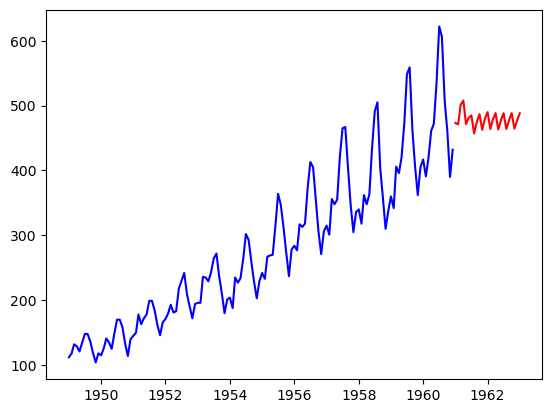

In [79]:
plt.plot(df,c='b')
plt.plot(pred1,c='r')
plt.show()

In [81]:
auto_arima(df_log,seasonal = True, m= 12)


ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [83]:
model_sarima = SARIMAX(df_log,order = (2,0,0),seasonal_order= (0,1,1,12))

In [85]:
RES = model_sarima.fit()

In [87]:
pred_log = RES.predict(start = 144, end = 167)

In [89]:
pred_f = np.exp(pred_log)

In [91]:
pred_f

1961-01-01    447.549360
1961-02-01    422.305357
1961-03-01    474.565626
1961-04-01    487.253937
1961-05-01    503.100044
1961-06-01    575.769758
1961-07-01    660.507457
1961-08-01    656.778354
1961-09-01    548.865102
1961-10-01    488.315558
1961-11-01    421.650629
1961-12-01    467.536067
1962-01-01    483.880915
1962-02-01    456.446035
1962-03-01    512.654473
1962-04-01    526.120206
1962-05-01    542.968717
1962-06-01    621.105453
1962-07-01    712.180686
1962-08-01    707.830030
1962-09-01    591.254633
1962-10-01    525.786684
1962-11-01    453.798522
1962-12-01    502.953670
Freq: MS, Name: predicted_mean, dtype: float64

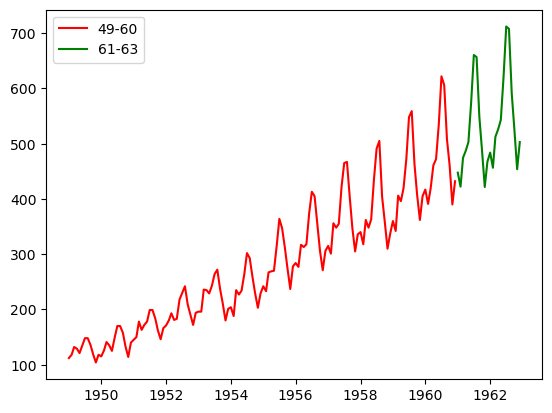

In [93]:
plt.plot(df,color='r',label = '49-60')
plt.plot(pred_f,color= 'g',label = '61-63')
plt.legend()
plt.show()

In [95]:
df1 = pd.read_csv(r"C:\Users\hp\Downloads\AirPassengers.csv")

In [97]:
df1

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [101]:
df1.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [103]:
df1.rename(columns = {'#Passengers':'Passengers'}, inplace = True)

In [105]:
df1.Month= pd.to_datetime(df1.Month)

In [107]:
df1 = df1.set_index('Month')

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [113]:
df1_log = np.log(df1)

In [115]:
df_train = df1_log.iloc[0:132]
df_test = df1_log.iloc[132:144]

In [117]:
df_train

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1959-08-01,6.326149
1959-09-01,6.137727
1959-10-01,6.008813


In [119]:
model_f = auto_arima(df_train,seasonal = True, m = 12)

In [120]:
model_f

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [123]:
model_sarima = SARIMAX(df_train,order =(2,0,0),seasonal_order = (0,1,1,12))

In [125]:
res = model_sarima.fit()

In [127]:
pred_log = res.predict(start = 132,end =143)

In [129]:
pre = np.exp(pred_log)

In [131]:
pre.shape

(12,)

In [137]:
df_test.shape

(12, 1)

In [145]:
actual = np.exp(df_test.Passengers)

In [147]:
actual.shape

(12,)

In [149]:
err = pre-actual

In [151]:
print(err)

1960-01-01     2.694159
1960-02-01     8.196893
1960-03-01    47.087463
1960-04-01    -7.635141
1960-05-01    -0.492011
1960-06-01     9.366777
1960-07-01    -3.757874
1960-08-01    19.280431
1960-09-01    14.003463
1960-10-01    -3.478387
1960-11-01    11.903550
1960-12-01    14.462972
Freq: MS, dtype: float64


In [153]:
mape = np.mean(np.abs(err*100/actual))

In [155]:
mape

2.599062727241406

In [157]:
from sklearn.metrics import mean_absolute_percentage_error

In [159]:
mean_absolute_percentage_error(actual,pre)*100

2.5990627272414057

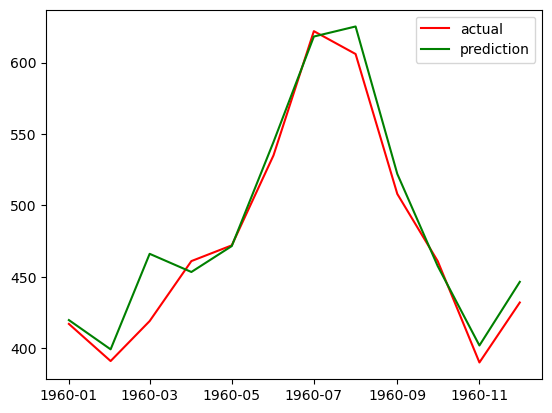

In [161]:
plt.plot(actual,c = 'r',label = 'actual')
plt.plot(pre,c = 'g',label = 'prediction')
plt.legend()
plt.show()

In [169]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [171]:
model = SARIMAX(df_train['Passengers'],order =(2,0,0),seasonal_order = (0,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 224.273
Date:                              Thu, 19 Sep 2024   AIC                           -440.546
Time:                                      12:01:18   BIC                           -429.396
Sample:                                  01-01-1949   HQIC                          -436.018
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6784      0.074      9.165      0.000       0.533       0.823
ar.L2          0.3147      0.076      4.161      0.000       0.166       0.463
ma.S.L12      -0.5628      0.094     -5.989      0.000      -0.747      -0.379
sigma2         0.0013      0.000      8.159      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.98   Prob(JB):                         0.61
Heteroskedasticity (H):               0.35   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""